In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import calmap


# О датасете - https://www.kaggle.com/robikscube/hourly-energy-consumption/data

# В датасете представлены данные о почасовом потреблении электроэнергии (МВт) в США
# Данные разделены по компаниям, предоставляющим услги электроснабжения в разных регионах страны
# Данные от каждой компании охватывают свой период наблюдений
# Однако все они охватываю перод с 2013 по 2018 гг.(кроме PJM_load - 1998 - 2002 гг. и NI - 2004 - 2011 гг.)

In [2]:
data = pd.read_csv('pjm_hourly_est.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178262 entries, 0 to 178261
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  178262 non-null  object 
 1   AEP       121273 non-null  float64
 2   COMED     66497 non-null   float64
 3   DAYTON    121275 non-null  float64
 4   DEOK      57739 non-null   float64
 5   DOM       116189 non-null  float64
 6   DUQ       119068 non-null  float64
 7   EKPC      45334 non-null   float64
 8   FE        62874 non-null   float64
 9   NI        58450 non-null   float64
 10  PJME      145366 non-null  float64
 11  PJMW      143206 non-null  float64
 12  PJM_Load  32896 non-null   float64
dtypes: float64(12), object(1)
memory usage: 17.0+ MB


In [4]:
data.describe()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
count,121273.000000,66497.000000,121275.000000,57739.000000,116189.000000,119068.000000,45334.000000,62874.000000,58450.000000,145366.000000,143206.000000,32896.000000
mean,15499.513717,11420.152112,2037.851140,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,32080.222831,5602.375089,29766.427408
std,2591.399065,2304.139517,393.403153,599.859026,2413.946569,301.740640,378.868404,1331.268006,2371.498701,6464.012166,979.142872,5849.769954
min,9581.000000,7237.000000,982.000000,907.000000,1253.000000,1014.000000,514.000000,0.000000,7003.000000,14544.000000,487.000000,17461.000000
25%,13630.000000,9780.000000,1749.000000,2687.000000,9322.000000,1444.000000,1185.000000,6807.000000,9954.000000,27573.000000,4907.000000,25473.000000
50%,15310.000000,11152.000000,2009.000000,3013.000000,10501.000000,1630.000000,1386.000000,7700.000000,11521.000000,31421.000000,5530.000000,29655.000000
75%,17200.000000,12510.000000,2279.000000,3449.000000,12378.000000,1819.000000,1699.000000,8556.000000,12896.750000,35650.000000,6252.000000,33073.250000
max,25695.000000,23753.000000,3746.000000,5445.000000,21651.000000,3054.000000,3490.000000,14032.000000,23631.000000,62009.000000,9594.000000,54030.000000


In [5]:
data.head(10)

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
0,1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1,1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
2,1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
3,1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
4,1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0
5,1998-12-31 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29382.0
6,1998-12-31 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31373.0
7,1998-12-31 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33272.0
8,1998-12-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34133.0
9,1998-12-31 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35232.0


In [6]:
data.tail(5)

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
178257,2018-01-01 20:00:00,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,NaN,44284.0,8401.0,NaN
178258,2018-01-01 21:00:00,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,NaN,43751.0,8373.0,NaN
178259,2018-01-01 22:00:00,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,NaN,42402.0,8238.0,NaN
178260,2018-01-01 23:00:00,20415.0,13336.0,2614.0,4224.0,17814.0,1820.0,2880.0,8676.0,NaN,40164.0,7958.0,NaN
178261,2018-01-02 00:00:00,19993.0,12816.0,2552.0,4100.0,17428.0,1721.0,2846.0,8393.0,NaN,38608.0,7691.0,NaN


# Гипотезы:
# - В выходные дни (суббота, воскресенье - 5,6 дни недели) среднее энергопотребление падает по сравнению с рабочей неделей (+)
# - Среднесуточное энергопотребление в летний период ниже, чем в другие времена года (-)
# - Энергопотребление в среднем растет из года в год (-)
# - Пик энергопотребления приходится на время после окончания рабочего дня (17:00 - 23:00) (+)


# Задача осложняется тем, что в наборе данных предствлена информация по территориям, находящимся в разных часовых поясах
# (Всего на территории США 6 часовых поясов)

# Рассмотрим пятилетний период, для которого имеются наиболее полные данные (1.06.13 - 3.08.18)

In [7]:
#Удалим столбцы, которые не охватывают выбранный период
del data["PJM_Load"]
del data["NI"]

In [8]:
#Удалим записи с отсутсвующими значениями, чтобы охватить выбранный период
data = data.dropna(subset = ["EKPC"])
data = data.sort_values(by='Datetime')
data = data.reset_index(drop=True)
data.describe()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,PJME,PJMW
count,45333.000000,45334.000000,45334.000000,45334.000000,45334.000000,45334.000000,45334.000000,45334.000000,45334.000000,45334.000000
mean,14900.136986,11361.793157,2008.910619,3119.953457,11169.062095,1621.692615,1464.218423,7791.757930,31477.446354,5605.698946
std,2523.989809,2242.075896,380.744295,604.158953,2479.802457,303.052997,378.868404,1318.986111,6447.674251,1024.658995
min,9581.000000,7237.000000,1151.000000,907.000000,6569.000000,1014.000000,514.000000,4909.000000,19255.000000,3197.000000
25%,13053.000000,9744.000000,1726.000000,2697.000000,9446.000000,1407.000000,1185.000000,6815.250000,26986.250000,4865.000000
50%,14597.000000,11089.000000,1978.000000,3022.000000,10687.000000,1579.000000,1386.000000,7694.000000,30481.500000,5476.000000
75%,16511.000000,12492.000000,2246.000000,3477.000000,12673.000000,1788.000000,1699.000000,8557.750000,35214.750000,6274.000000
max,24739.000000,22269.000000,3398.000000,5308.000000,21651.000000,2951.000000,3490.000000,13141.000000,59122.000000,9594.000000


In [9]:
data.head(10)

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,PJME,PJMW
0,2013-06-01 01:00:00,13477.0,11378.0,1682.0,2773.0,10150.0,1739.0,1166.0,7099.0,32085.0,4808.0
1,2013-06-01 02:00:00,12699.0,10584.0,1568.0,2613.0,9406.0,1641.0,1098.0,6617.0,29778.0,4252.0
2,2013-06-01 03:00:00,12274.0,9973.0,1514.0,2499.0,8910.0,1569.0,1036.0,6351.0,28145.0,4179.0
3,2013-06-01 04:00:00,11904.0,9451.0,1467.0,2409.0,8551.0,1518.0,1023.0,6201.0,27031.0,4097.0
4,2013-06-01 05:00:00,11862.0,9184.0,1456.0,2392.0,8413.0,1503.0,949.0,6157.0,26404.0,3861.0
5,2013-06-01 06:00:00,11976.0,9043.0,1485.0,2425.0,8409.0,1515.0,1017.0,6187.0,26261.0,4058.0
6,2013-06-01 07:00:00,12447.0,9054.0,1511.0,2469.0,8582.0,1531.0,1036.0,6257.0,27012.0,4166.0
7,2013-06-01 08:00:00,12713.0,9290.0,1596.0,2606.0,9600.0,1586.0,1096.0,6606.0,29631.0,4644.0
8,2013-06-01 09:00:00,13730.0,9980.0,1711.0,2823.0,10816.0,1745.0,1200.0,7182.0,32969.0,5163.0
9,2013-06-01 10:00:00,14609.0,10590.0,1823.0,3013.0,12017.0,1903.0,1285.0,7777.0,36070.0,5706.0


In [10]:
data.tail(24)

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,PJME,PJMW
45310,2018-08-02 01:00:00,13286.0,11916.0,1789.0,2963.0,11457.0,1480.0,1303.0,6996.0,34283.0,5100.0
45311,2018-08-02 02:00:00,12587.0,11095.0,1717.0,2791.0,10830.0,1400.0,1191.0,6673.0,32094.0,4840.0
45312,2018-08-02 03:00:00,12296.0,10530.0,1632.0,2682.0,10353.0,1351.0,1107.0,6489.0,30543.0,4745.0
45313,2018-08-02 04:00:00,12059.0,10165.0,1605.0,2613.0,10082.0,1346.0,1020.0,6371.0,29791.0,4572.0
45314,2018-08-02 05:00:00,12224.0,9931.0,1604.0,2613.0,10058.0,1353.0,1070.0,6407.0,29854.0,4594.0
45315,2018-08-02 06:00:00,12781.0,9996.0,1684.0,2728.0,10490.0,1413.0,1156.0,6754.0,31197.0,4826.0
45316,2018-08-02 07:00:00,13661.0,10482.0,1820.0,2956.0,11181.0,1503.0,1204.0,7234.0,33182.0,5114.0
45317,2018-08-02 08:00:00,14326.0,11200.0,1927.0,3083.0,11850.0,1592.0,1276.0,7594.0,35645.0,5333.0
45318,2018-08-02 09:00:00,14834.0,12179.0,2023.0,3239.0,12555.0,1674.0,1319.0,7927.0,37810.0,5597.0
45319,2018-08-02 10:00:00,15309.0,13042.0,2107.0,3359.0,13232.0,1735.0,1356.0,8231.0,39902.0,5775.0


In [11]:
data = data.dropna()
data.describe()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,PJME,PJMW
count,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000
mean,14900.136986,11361.785962,2008.911058,3119.956897,11169.094479,1621.690733,1464.224119,7791.749300,31477.473673,5605.702733
std,2523.989809,2242.100102,380.748483,604.165173,2479.820222,303.056075,378.870641,1318.999379,6447.742743,1024.669979
min,9581.000000,7237.000000,1151.000000,907.000000,6569.000000,1014.000000,514.000000,4909.000000,19255.000000,3197.000000
25%,13053.000000,9744.000000,1726.000000,2697.000000,9446.000000,1407.000000,1185.000000,6815.000000,26986.000000,4865.000000
50%,14597.000000,11089.000000,1978.000000,3022.000000,10687.000000,1579.000000,1386.000000,7694.000000,30482.000000,5476.000000
75%,16511.000000,12492.000000,2246.000000,3477.000000,12673.000000,1788.000000,1699.000000,8558.000000,35215.000000,6274.000000
max,24739.000000,22269.000000,3398.000000,5308.000000,21651.000000,2951.000000,3490.000000,13141.000000,59122.000000,9594.000000


# Как видно - в нашем распоряжении данные о ежечасном потребелнии за пять лет

In [12]:
#Приведем даты к более удобному для манипуляций виду
ddata = data.copy()
ddata['date'] = ddata["Datetime"]
ddata['hour'] = pd.to_datetime(ddata['date']).dt.hour
ddata['dayofweek'] = pd.to_datetime(ddata['date']).dt.dayofweek
ddata['quarter'] = pd.to_datetime(ddata['date']).dt.quarter
ddata['month'] = pd.to_datetime(ddata['date']).dt.month
ddata['year'] = pd.to_datetime(ddata['date']).dt.year
ddata['dayofyear'] = pd.to_datetime(ddata['date']).dt.dayofyear
ddata['dayofmonth'] = pd.to_datetime(ddata['date']).dt.day
ddata['weekofyear'] = pd.to_datetime(ddata['date']).dt.weekofyear
    
X = ddata[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
data_part = data[['Datetime', 'AEP','COMED','DAYTON','DEOK','DOM','DUQ','EKPC',"FE", "PJME", "PJMW"]]

date_data = pd.concat([X, data_part], axis = 1)
date_data.reset_index()
date_data.head(26)


,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,PJME,PJMW
0,1,5,2,6,2013,152,1,22,2013-06-01 01:00:00,13477.0,11378.0,1682.0,2773.0,10150.0,1739.0,1166.0,7099.0,32085.0,4808.0
1,2,5,2,6,2013,152,1,22,2013-06-01 02:00:00,12699.0,10584.0,1568.0,2613.0,9406.0,1641.0,1098.0,6617.0,29778.0,4252.0
2,3,5,2,6,2013,152,1,22,2013-06-01 03:00:00,12274.0,9973.0,1514.0,2499.0,8910.0,1569.0,1036.0,6351.0,28145.0,4179.0
3,4,5,2,6,2013,152,1,22,2013-06-01 04:00:00,11904.0,9451.0,1467.0,2409.0,8551.0,1518.0,1023.0,6201.0,27031.0,4097.0
4,5,5,2,6,2013,152,1,22,2013-06-01 05:00:00,11862.0,9184.0,1456.0,2392.0,8413.0,1503.0,949.0,6157.0,26404.0,3861.0
5,6,5,2,6,2013,152,1,22,2013-06-01 06:00:00,11976.0,9043.0,1485.0,2425.0,8409.0,1515.0,1017.0,6187.0,26261.0,4058.0
6,7,5,2,6,2013,152,1,22,2013-06-01 07:00:00,12447.0,9054.0,1511.0,2469.0,8582.0,1531.0,1036.0,6257.0,27012.0,4166.0
7,8,5,2,6,2013,152,1,22,2013-06-01 08:00:00,12713.0,9290.0,1596.0,2606.0,9600.0,1586.0,1096.0,6606.0,29631.0,4644.0
8,9,5,2,6,2013,152,1,22,2013-06-01 09:00:00,13730.0,9980.0,1711.0,2823.0,10816.0,1745.0,1200.0,7182.0,32969.0,5163.0
9,10,5,2,6,2013,152,1,22,2013-06-01 10:00:00,14609.0,10590.0,1823.0,3013.0,12017.0,1903.0,1285.0,7777.0,36070.0,5706.0


# Выясним, по каким штатам и часовым поясам предоставлена метрики:
#   AEP - штаты Техас и Огайо
#   COMED - штат Иллинойс
#   DAYTON - Огайо 
#   DEOK - Огайо и Кентукки
#   DOM - Верджиния
#   DUQ - Филадельфия
#   EKPC - Кентукки
#   FE - Огайо, Пенсильвания, Верджиния, Мэриленд, Нью-Джерси 
#   PJME - восточный регион (большая часть территорий прнадлежит часовому поясу UTF-05)
#   PJMW - Техас
#   https://www.memotest.ru//ImageUpload/c22c4e20-61ed-43dd-96d0-06f99596ad1e/usa_time_zones.jpg
#   https://i.pinimg.com/originals/8c/a2/9f/8ca29f7dfc1e852fcfba04b246af655c.jpg
# Из полученной информации по метрикам видно, что представленная информация относится преимущественно к одному часовому поясу - UTF-05
# Корректировка по времени не требуется

In [13]:
#Т.к. время корректно, в дальнейшем будем оперировать суммарным потреблением восточного региона
date_data["energy_total_east"] = date_data['AEP']+date_data['COMED']+date_data['DAYTON']+date_data['DEOK']+date_data['DOM']+date_data['DUQ']+date_data['EKPC']+date_data['FE']+date_data['PJME']+date_data['PJMW']
date_data.describe()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,PJME,PJMW,energy_total_east
count,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000
mean,11.500254,2.999360,2.509585,6.525423,2015.500408,183.121523,15.713520,26.606490,14900.136986,11361.785962,2008.911058,3119.956897,11169.094479,1621.690733,1464.224119,7791.749300,31477.473673,5605.702733,90520.725939
std,6.922338,2.000347,1.101997,3.392179,1.543447,103.705792,8.807766,14.826918,2523.989809,2242.100102,380.748483,604.165173,2479.820222,303.056075,378.870641,1318.999379,6447.742743,1024.669979,16798.515822
min,0.000000,0.000000,1.000000,1.000000,2013.000000,1.000000,1.000000,1.000000,9581.000000,7237.000000,1151.000000,907.000000,6569.000000,1014.000000,514.000000,4909.000000,19255.000000,3197.000000,57111.000000
25%,6.000000,1.000000,2.000000,4.000000,2014.000000,95.000000,8.000000,14.000000,13053.000000,9744.000000,1726.000000,2697.000000,9446.000000,1407.000000,1185.000000,6815.000000,26986.000000,4865.000000,78592.000000
50%,12.000000,3.000000,3.000000,7.000000,2016.000000,183.000000,16.000000,27.000000,14597.000000,11089.000000,1978.000000,3022.000000,10687.000000,1579.000000,1386.000000,7694.000000,30482.000000,5476.000000,88171.000000
75%,18.000000,5.000000,3.000000,9.000000,2017.000000,271.000000,23.000000,39.000000,16511.000000,12492.000000,2246.000000,3477.000000,12673.000000,1788.000000,1699.000000,8558.000000,35215.000000,6274.000000,100757.000000
max,23.000000,6.000000,4.000000,12.000000,2018.000000,366.000000,31.000000,53.000000,24739.000000,22269.000000,3398.000000,5308.000000,21651.000000,2951.000000,3490.000000,13141.000000,59122.000000,9594.000000,157509.000000


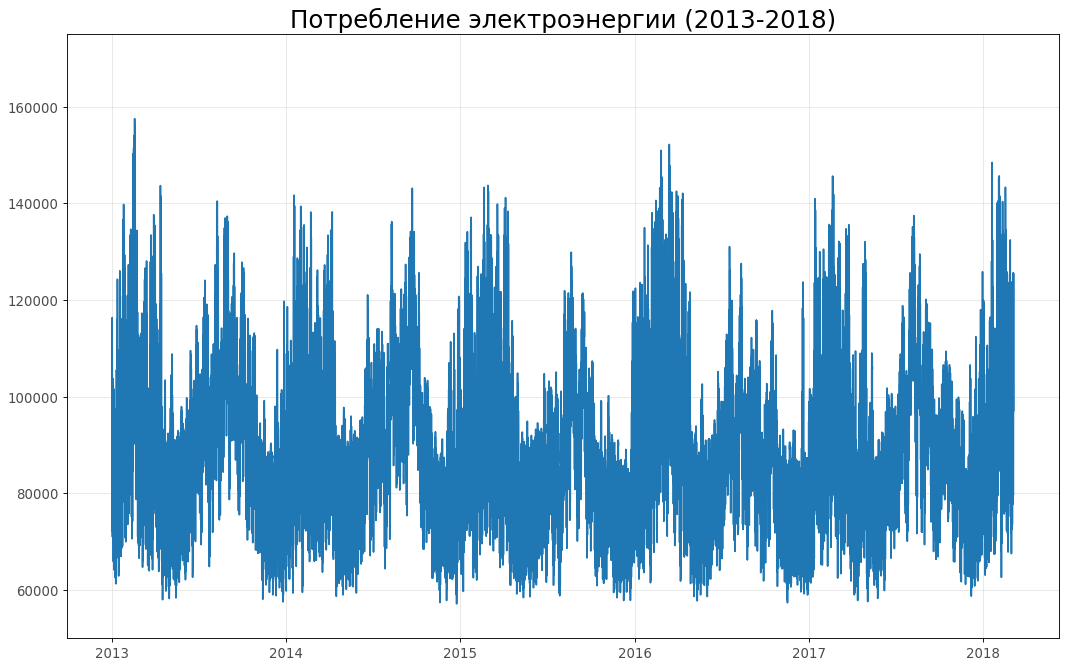

In [14]:
#Получим общее представление о наборе данных 
df = date_data[['Datetime', 'energy_total_east']]

# Отобразим график временного ряда, задав входные данные
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('Datetime', 'energy_total_east', data=df)

# Настроим внешний вид
plt.ylim(50000, 175000)
xtick_location = df.index.tolist()[::8760]
xtick_labels = [x[:-15] for x in df.Datetime.tolist()[::8760]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Потребление электроэнергии (2013-2018)", fontsize=22)
plt.grid(axis='both', alpha=.3)


plt.show()

# Видимого роста потребления электроэнергии из года в год не наблюдается

# Как видно, энергопотребление в летний период куда выше, чем в остальные времена года (ниже мы более ярко увидим это)
## Данный график не совсем корректен, но дает неплохое представление о данных; я исправлю его ниже, взяв средние значения по дням

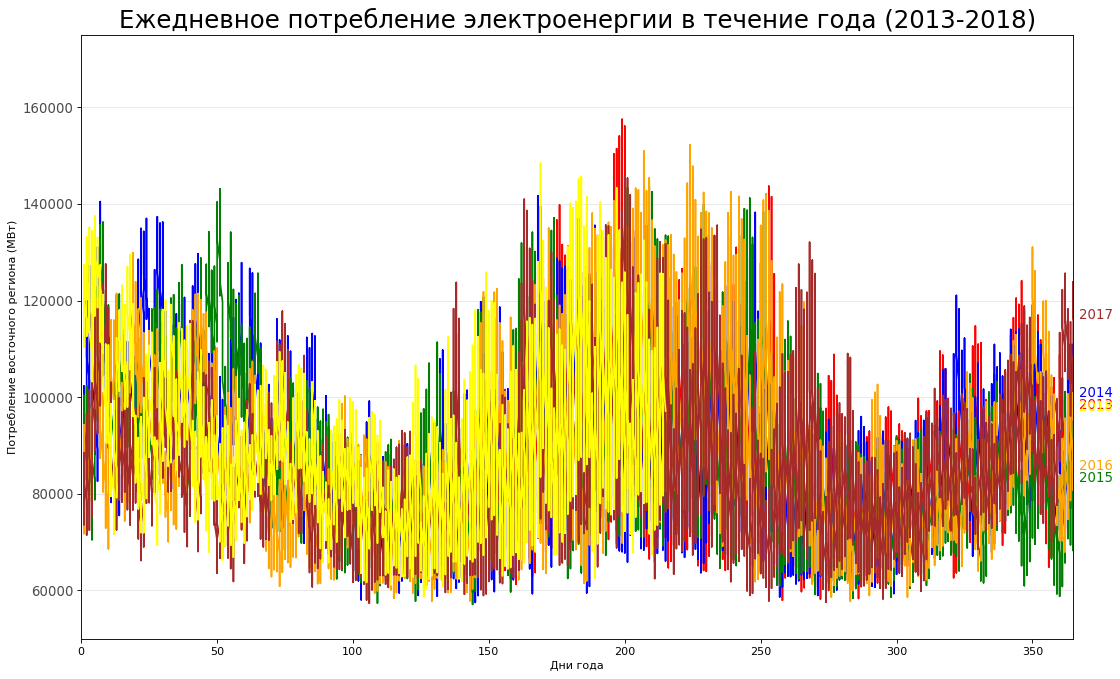

In [15]:
from dateutil.parser import parse 
#Рассмотрим, как меняется тенденция энергопотребления по годам. Посмотрим, имеет ли место какая-либо закономерность

df = date_data[['Datetime', 'energy_total_east', 'year', 'month', 'dayofyear']]
years = df['year'].unique()


mycolors = ['red', 'blue', 'green', 'orange', 'brown', 'yellow']      
plt.figure(figsize=(16,10), dpi= 80)

#Отобразим графики по годам в одних координатах
for i, y in enumerate(years):
    plt.plot('dayofyear', 'energy_total_east', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
    plt.text(367, df.loc[df.year==y, 'energy_total_east'][-1:].values[0], y, fontsize=12, color=mycolors[i])

#Настроим внешний вид
plt.ylim(50000,175000)
plt.xlim(0, 365)
plt.ylabel('Потребление восточного региона (МВт)')
plt.xlabel('Дни года')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Ежедневное потребление электроенергии в течение года (2013-2018)", fontsize=22)
plt.grid(axis='y', alpha=.3)

plt.show()

# По данному графику видно, что имеет место общая тенденция электропотребления. 
# Заметных изменений в ней за исследуемые ~5 лет не наблюдается

In [16]:
year_2013 = date_data.groupby('year').get_group(2013)
year_2013_data_min = year_2013.groupby('dayofyear').aggregate({'energy_total_east':'min'})
year_2013_data_max = year_2013.groupby('dayofyear').aggregate({'energy_total_east':'max'})
year_2013_data_min.rename(columns={"energy_total_east":"energy_total_east_min"},inplace='True')
year_2013_data_max.rename(columns={"energy_total_east":"energy_total_east_max"},inplace='True')
year_2013_data_mm2013=pd.concat([year_2013_data_min,year_2013_data_max], axis=1)
#year_2013_data_mm2013.to_csv("year_2013_data.csv", header=True, sep=',')

year_2014 = date_data.groupby('year').get_group(2014)
year_2014_data_min = year_2014.groupby('dayofyear').aggregate({'energy_total_east':'min'})
year_2014_data_max = year_2014.groupby('dayofyear').aggregate({'energy_total_east':'max'})
year_2014_data_min.rename(columns={"energy_total_east":"energy_total_east_min"},inplace='True')
year_2014_data_max.rename(columns={"energy_total_east":"energy_total_east_max"},inplace='True')
year_2014_data_mm2014=pd.concat([year_2014_data_min,year_2014_data_max], axis=1)
#year_2014_data_mm2014.to_csv("year_2014_data.csv", header=True, sep=',')

year_2015 = date_data.groupby('year').get_group(2015)
year_2015_data_min = year_2015.groupby('dayofyear').aggregate({'energy_total_east':'min'})
year_2015_data_max = year_2015.groupby('dayofyear').aggregate({'energy_total_east':'max'})
year_2015_data_min.rename(columns={"energy_total_east":"energy_total_east_min"},inplace='True')
year_2015_data_max.rename(columns={"energy_total_east":"energy_total_east_max"},inplace='True')
year_2015_data_mm2015=pd.concat([year_2015_data_min,year_2015_data_max], axis=1)
#year_2015_data_mm2015.to_csv("year_2015_data.csv", header=True, sep=',')

year_2016 = date_data.groupby('year').get_group(2016)
year_2016_data_min = year_2016.groupby('dayofyear').aggregate({'energy_total_east':'min'})
year_2016_data_max = year_2016.groupby('dayofyear').aggregate({'energy_total_east':'max'})
year_2016_data_min.rename(columns={"energy_total_east":"energy_total_east_min"},inplace='True')
year_2016_data_max.rename(columns={"energy_total_east":"energy_total_east_max"},inplace='True')
year_2016_data_mm2016=pd.concat([year_2016_data_min,year_2016_data_max], axis=1)
#year_2016_data_mm2016.to_csv("year_2016_data.csv", header=True, sep=',')

year_2017 = date_data.groupby('year').get_group(2017)
year_2017_data_min = year_2017.groupby('dayofyear').aggregate({'energy_total_east':'min'})
year_2017_data_max = year_2017.groupby('dayofyear').aggregate({'energy_total_east':'max'})
year_2017_data_min.rename(columns={"energy_total_east":"energy_total_east_min"},inplace='True')
year_2017_data_max.rename(columns={"energy_total_east":"energy_total_east_max"},inplace='True')
year_2017_data_mm2017=pd.concat([year_2017_data_min,year_2017_data_max], axis=1)
#year_2017_data_mm2017.to_csv("year_2017_data.csv", header=True, sep=',')

year_2018 = date_data.groupby('year').get_group(2018)
year_2018_data_min = year_2018.groupby('dayofyear').aggregate({'energy_total_east':'min'})
year_2018_data_max = year_2018.groupby('dayofyear').aggregate({'energy_total_east':'max'})
year_2018_data_min.rename(columns={"energy_total_east":"energy_total_east_min"},inplace='True')
year_2018_data_max.rename(columns={"energy_total_east":"energy_total_east_max"},inplace='True')
year_2018_data_mm2018=pd.concat([year_2018_data_min,year_2018_data_max], axis=1)
#year_2018_data_mm2018.to_csv("year_2018_data.csv", header=True, sep=',')

In [35]:
summ_by_year = date_data.groupby("year")['energy_total_east'].sum()
summ_by_year
summ_by_hour = date_data.groupby("hour")['energy_total_east'].sum()
summ_by_hour
summ_by_week_of_year = date_data.groupby("weekofyear")['energy_total_east'].sum()
summ_by_week_of_year

weekofyear
1      85907086.0
2      86096481.0
3      84210796.0
4      81832897.0
5      84022500.0
6      83948032.0
7      81466439.0
8      77826996.0
9      79783155.0
10     76623680.0
11     74310272.0
12     71937544.0
13     70606806.0
14     68700167.0
15     65626902.0
16     65129305.0
17     64773862.0
18     64821839.0
19     66033164.0
20     68799208.0
21     69840963.0
22     79030709.0
23     86315422.0
24     95263275.0
25     99216597.0
26     98844682.0
27     98360258.0
28    104475346.0
29    107426508.0
30    101752753.0
31     92389300.0
32     83471016.0
33     82085074.0
34     82789967.0
35     79213870.0
36     80735753.0
37     75753458.0
38     72899107.0
39     67740579.0
40     68184633.0
41     65545038.0
42     65448266.0
43     66098762.0
44     66466503.0
45     68653260.0
46     71450794.0
47     73154215.0
48     72720944.0
49     77286320.0
50     81743299.0
51     77590874.0
52     74990696.0
53     14180697.0
Name: energy_total_east, dtype: flo

AttributeError: 'DataFrame' object has no attribute 'ix'

<Figure size 1280x800 with 0 Axes>

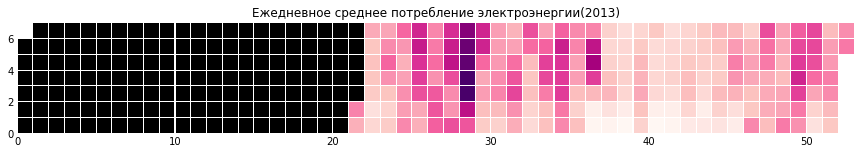

In [18]:
# Рассмотрим эту тенденцию более детально по годам
# Найдем среднее энергопотребление в час для каждого дня года
# 2013
year_2013 = date_data.groupby('year').get_group(2013)
year_2013_data = year_2013.groupby('dayofyear').aggregate({'energy_total_east':'mean'})
index = [x[:10] for x in year_2013.Datetime.tolist()[::24]]

# Библиотека требует специального формата входных данных {Datetime - index, data}
year_2013_data = year_2013_data.assign(Datetime = index)
year_2013_data['Datetime'] = pd.to_datetime(year_2013_data['Datetime'],format ='%Y-%m-%d')
year_2013_data.set_index(year_2013_data['Datetime'], inplace = True)

# Отобразим графику
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(year_2013_data.iloc[:, 0], monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='RdPu',
                    fillcolor='black', linewidth=0.05,
                    fig_kws=dict(figsize=(15, 6)), subplot_kws={'title':'Ежедневное среднее потребление электроэнергии(2013)'})
plt.show()
# Ошибка AttributeError связана с тем, что библиотека уже давно не обновлялась автором

AttributeError: 'DataFrame' object has no attribute 'ix'

<Figure size 1280x800 with 0 Axes>

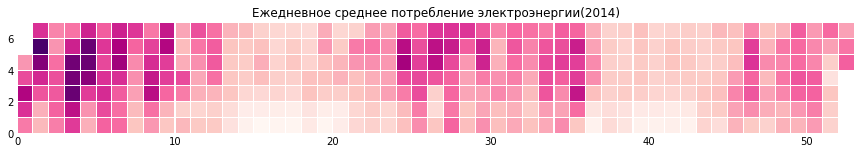

In [19]:
# 2014
year_2014 = date_data.groupby('year').get_group(2014)
year_2014_data = year_2014.groupby('dayofyear').aggregate({'energy_total_east':'mean'})
index = [x[:10] for x in year_2014.Datetime.tolist()[::24]]

year_2014_data = year_2014_data.assign(Datetime = index)
year_2014_data['Datetime'] = pd.to_datetime(year_2014_data['Datetime'],format ='%Y-%m-%d')

year_2014_data.set_index(year_2014_data['Datetime'], inplace = True)
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(year_2014_data.iloc[:, 0], monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='RdPu',
                    fillcolor='black', linewidth=0.05,
                    fig_kws=dict(figsize=(15, 6)), subplot_kws={'title':'Ежедневное среднее потребление электроэнергии(2014)'})
plt.show()

AttributeError: 'DataFrame' object has no attribute 'ix'

<Figure size 1280x800 with 0 Axes>

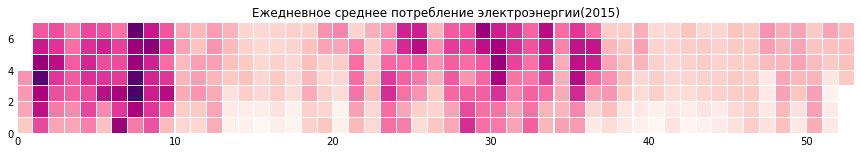

In [20]:
# 2015
year_2015 = date_data.groupby('year').get_group(2015)
year_2015_data = year_2015.groupby('dayofyear').aggregate({'energy_total_east':'mean'})
index = [x[:10] for x in year_2015.Datetime.tolist()[::24]]

year_2015_data = year_2015_data.assign(Datetime = index)
year_2015_data['Datetime'] = pd.to_datetime(year_2015_data['Datetime'],format ='%Y-%m-%d')

year_2015_data.set_index(year_2015_data['Datetime'], inplace = True)
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(year_2015_data.iloc[:, 0], monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='RdPu',
                    fillcolor='black', linewidth=0.05,
                    fig_kws=dict(figsize=(15, 6)), subplot_kws={'title':'Ежедневное среднее потребление электроэнергии(2015)'})
plt.show()

AttributeError: 'DataFrame' object has no attribute 'ix'

<Figure size 1280x800 with 0 Axes>

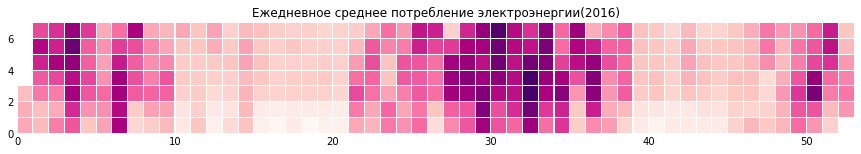

In [21]:
# 2016
year_2016 = date_data.groupby('year').get_group(2016)
year_2016_data = year_2016.groupby('dayofyear').aggregate({'energy_total_east':'mean'})
index = [x[:10] for x in year_2016.Datetime.tolist()[::24]]

year_2016_data = year_2016_data.assign(Datetime = index)
year_2016_data['Datetime'] = pd.to_datetime(year_2016_data['Datetime'],format ='%Y-%m-%d')

year_2016_data.set_index(year_2016_data['Datetime'], inplace = True)
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(year_2016_data.iloc[:, 0], monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='RdPu',
                    fillcolor='black', linewidth=0.05,
                    fig_kws=dict(figsize=(15, 6)), subplot_kws={'title':'Ежедневное среднее потребление электроэнергии(2016)'})
plt.show()

AttributeError: 'DataFrame' object has no attribute 'ix'

<Figure size 1280x800 with 0 Axes>

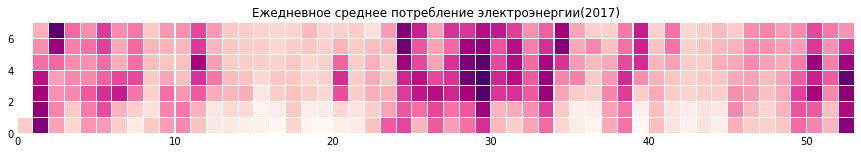

In [22]:
# 2017
year_2017 = date_data.groupby('year').get_group(2017)
year_2017_data = year_2017.groupby('dayofyear').aggregate({'energy_total_east':'mean'})
index = [x[:10] for x in year_2017.Datetime.tolist()[::24]]

year_2017_data = year_2017_data.assign(Datetime = index)
year_2017_data['Datetime'] = pd.to_datetime(year_2017_data['Datetime'],format ='%Y-%m-%d')

year_2017_data.set_index(year_2017_data['Datetime'], inplace = True)
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(year_2017_data.iloc[:, 0], monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='RdPu',
                    fillcolor='black', linewidth=0.05,
                    fig_kws=dict(figsize=(15, 6)), subplot_kws={'title':'Ежедневное среднее потребление электроэнергии(2017)'})
plt.show()

AttributeError: 'DataFrame' object has no attribute 'ix'

<Figure size 1280x800 with 0 Axes>

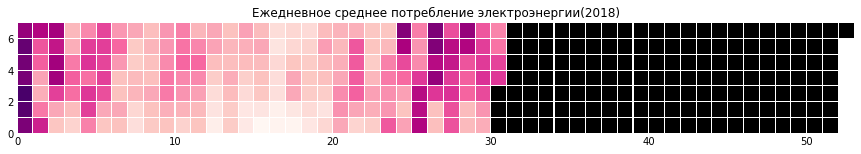

In [23]:
# 2018
year_2018 = date_data.groupby('year').get_group(2018)
year_2018_data = year_2018.groupby('dayofyear').aggregate({'energy_total_east':'mean'})
year_2018_data.drop(year_2018_data.tail(1).index, inplace = True)
index = [x[:10] for x in year_2018.Datetime.tolist()[::24]]

year_2018_data = year_2018_data.assign(Datetime = index)
year_2018_data['Datetime'] = pd.to_datetime(year_2018_data['Datetime'],format ='%Y-%m-%d')

year_2018_data.set_index(year_2018_data['Datetime'], inplace = True)
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(year_2018_data.iloc[:, 0], monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='RdPu',
                    fillcolor='black', linewidth=0.05,
                    fig_kws=dict(figsize=(15, 6)), subplot_kws={'title':'Ежедневное среднее потребление электроэнергии(2018)'})
plt.show()

AttributeError: 'Timestamp' object has no attribute 'to_string'

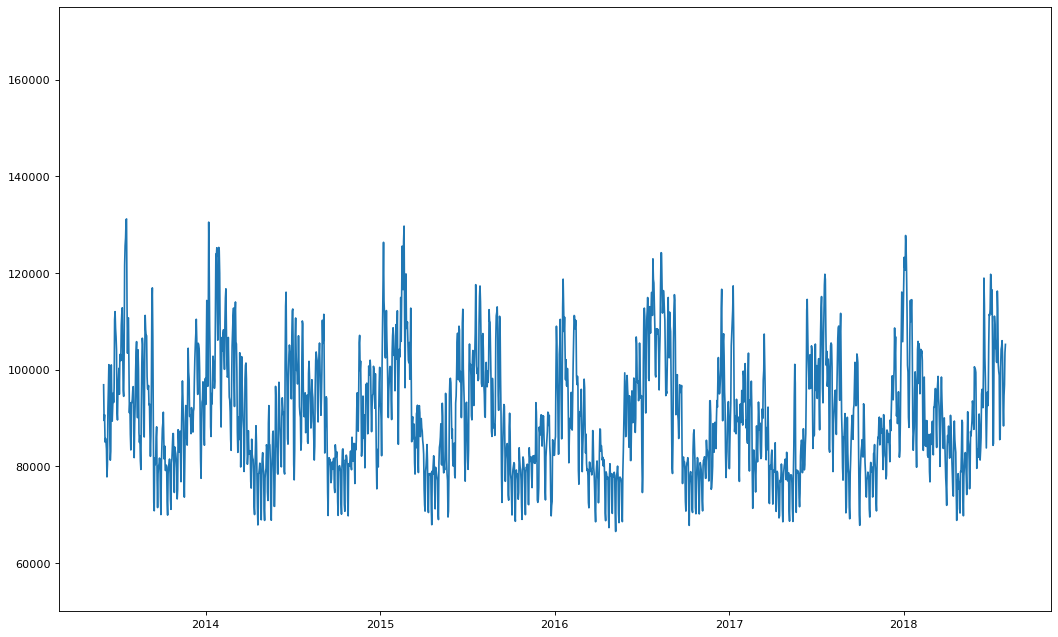

In [24]:
# Вторая версия графика из начала. На графике представлены данные о среднем ежечасном потреблении в день за 5 лет

date_consumption_data = pd.concat([year_2013_data, year_2014_data, year_2015_data, year_2016_data, year_2017_data, year_2018_data])
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('Datetime', 'energy_total_east', data=date_consumption_data)

# Настроим внешний вид
plt.ylim(50000, 175000)
xtick_location = date_consumption_data.Datetime.tolist()[::300]
xtick_labels = [[pd.to_datetime(x).to_string()]for x in date_consumption_data.Datetime.tolist()[::300]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Среднее ежедневное потребление электроэнергии (2013-2018)", fontsize=22)
plt.grid(axis='both', alpha=.3)

plt.show()


In [25]:
date_consumption_data
#date_consumption_data.to_csv("mean_hourly_consumption.csv", header = True, sep=",")

,energy_total_east,Datetime
Datetime,,
2013-06-01,96866.217391,2013-06-01
2013-06-02,89456.625000,2013-06-02
2013-06-03,90663.333333,2013-06-03
2013-06-04,85008.750000,2013-06-04
2013-06-05,85768.625000,2013-06-05
...,...,...
2018-07-29,88349.791667,2018-07-29
2018-07-30,94588.666667,2018-07-30
2018-07-31,96856.666667,2018-07-31


In [26]:
# Посмотрим грубую оценку энергопотребления по дням недели
avarage_week_consumption = date_data.groupby('dayofweek').aggregate({'energy_total_east':'mean'})
avarage_week_consumption

,energy_total_east
dayofweek,
0,92205.352160
1,93920.417966
2,93560.653395
3,93147.673302
4,92025.907078
5,85463.931162
6,83324.012041


In [29]:
avarage_week_consumption['energy_total_east'].to_csv("mean_weekly_consumption.txt",  header = True, sep=",")

In [ ]:
import random
# Готовим данные и цвета
n = avarage_week_consumption.index.unique().__len__()
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(400)
c = random.choices(all_colors, k=n)

# Отображаем столбцы
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(avarage_week_consumption.index+1, avarage_week_consumption['energy_total_east'], color=c, width=.5)
for i, val in enumerate(avarage_week_consumption['energy_total_east'].values):
    plt.text(i+1, val, "%.0f"%float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':15})

# Настраиваем внешний вид
plt.title("Среднее энергопотребление по дням недели", fontsize=22)
plt.xlabel('Дни недели (ПН - ВС)')
plt.ylabel('Энергопотребление восточного региона (МВт)')
plt.ylim(0, 175000)
plt.xlim(0, 8)
plt.show()


In [ ]:
# Получим средние значения ежечасного энергопотребления в зависимости от того, выходной это или нет. Для каждой недели
date_consumption_data['dayofweek']=pd.to_datetime(date_consumption_data['Datetime']).dt.dayofweek
date_consumption_weekend = date_consumption_data[(date_consumption_data['dayofweek'] == 5) | (date_consumption_data['dayofweek'] == 6)]
date_consumption_weekday = date_consumption_data[(date_consumption_data['dayofweek'] != 5) & (date_consumption_data['dayofweek'] != 6)]
date_consumption_weekday = date_consumption_weekday.assign(week=date_consumption_weekday.groupby('dayofweek').cumcount())
date_consumption_weekend = date_consumption_weekend.assign(week=date_consumption_weekend.groupby('dayofweek').cumcount())
weekday_mean = date_consumption_weekday.groupby('week').mean()
weekend_mean = date_consumption_weekend.groupby('week').mean()
del weekday_mean['dayofweek']
del weekend_mean['dayofweek']
weekday_mean

In [ ]:
weekend_mean

In [ ]:
#Получим представление о распределении этих величин, чтобы точнее оценить энергопотребление на неделе и в выходные

# Отобразим графики распределения величин
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(weekday_mean['energy_total_east'], shade=True, color="g", label="будние дни", alpha=.7)
sns.kdeplot(weekend_mean['energy_total_east'], shade=True, color="deeppink", label="выходные", alpha=.7)


# Настроим внешний вид
plt.title('Распределение средних значений электропотребления в будние дни и выходные ', fontsize=22)
plt.xlabel('Среднее энергопотребление восточного региона (МВт) за заданный период (5 дней или 2 дня)')
plt.ylabel('Вероятность появления значения в выборке')
plt.legend()
plt.show()

Распределение для будних дней смещено в сторону бо'льших значений, что подтверждает гипотезу №1

In [ ]:
# Проведем такую же оценку, но в зависимости от времени дня (вечерние час - остальные сутки)
hours_mean = date_data[['hour', 'energy_total_east']].groupby('hour').mean()
n = hours_mean.index.unique().__len__()
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(4)
c = random.choices(all_colors, k=n)

# Отобразим столбцы
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(hours_mean.index, hours_mean['energy_total_east'], color=c, width=.5)
for i, val in enumerate(hours_mean['energy_total_east'].values):
    plt.text(i, val+random.randint(0,10000), '%.0f' % float(val), horizontalalignment='center', verticalalignment='bottom',bbox = dict(facecolor='red',alpha=0.0), 
             fontdict={'fontweight':500, 'size':10})

# Настроим внешний вид
plt.title("Среднее энергопотребление по часам", fontsize=22)
plt.xlabel('Часы (00 - 23)')
plt.ylabel('Энергопотребление восточного региона (МВт)')
plt.ylim(0, 175000)
plt.xlim(-1, 24)
plt.show()

In [ ]:
#hours_mean.to_csv("mean_daily_consumption.csv", header= True, sep=",")

In [ ]:
# Подготовка данных для графика распрееления
data_peak_hours = date_data[(date_data['hour'] >= 17)]
data_other_hours = date_data[(date_data['hour'] < 17)]
data_peak_hours = data_peak_hours.assign(day=data_peak_hours.groupby('hour').cumcount())
data_other_hours = data_other_hours.assign(day=data_other_hours.groupby('hour').cumcount())
data_peak_hours = data_peak_hours[['hour', 'energy_total_east', 'day']]
data_other_hours = data_other_hours[['hour', 'energy_total_east', 'day']]
peak_hours_mean = data_peak_hours.groupby('day').mean()
other_hours_mean = data_other_hours.groupby('day').mean()
del peak_hours_mean['hour']
del other_hours_mean['hour']



In [ ]:
other_hours_mean

In [ ]:
# Отобразим графики распределения величин
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(peak_hours_mean['energy_total_east'], shade=True, color="r", label="часы, после рабочего дня (17 - 23)", alpha=.7)
sns.kdeplot(other_hours_mean['energy_total_east'], shade=True, color="b", label="остальная часть суток", alpha=.7)


# Настроим внешний вид
plt.title('Распределение средних значений электропотребления в час', fontsize=22)
plt.xlabel('Среднее энергопотребление в час восточного региона (МВт) ')
plt.ylabel('Вероятность появления значения в выборке')
plt.legend()
plt.show()

Распределение для вечерних часов смещено в сторону бо'льших значений, что подтверждает гипотезу №4